### Change data to pkl

In [15]:
import pandas as pd
import os
import numpy as np
from collections import OrderedDict
from tqdm.notebook import tqdm
import pickle

dataPath = "A:/2022 Spring/INFO 5375/HW 2/dataset"

In [16]:
def load_data(dataPath):
    patients = OrderedDict()
    for patient in tqdm(os.listdir(dataPath)):
        df = pd.read_csv(dataPath + '/' + patient, sep='|')
        patients[patient[:-4]] = df
    return patients

patients = load_data(dataPath)

  0%|          | 0/40336 [00:00<?, ?it/s]

In [17]:
with open('patients.pkl', 'wb') as f:
    pickle.dump(patients, f)

### Load pkl data

In [18]:
import pandas as pd
import os
import numpy as np
from collections import OrderedDict
from tqdm.notebook import tqdm
import pickle

with open('patients.pkl', 'rb') as f:
    patients = pickle.load(f)

In [162]:
mergedData = pd.concat(list(patients.values()))

In [163]:
totalLen = mergedData.shape[0]

In [164]:
nans = []
values = []

for c in mergedData.columns:
    nans.append(100*mergedData[c].isnull().sum()/totalLen)
    values.append(100 - 100*mergedData[c].isnull().sum()/totalLen)

In [165]:
bar_label = mergedData.columns

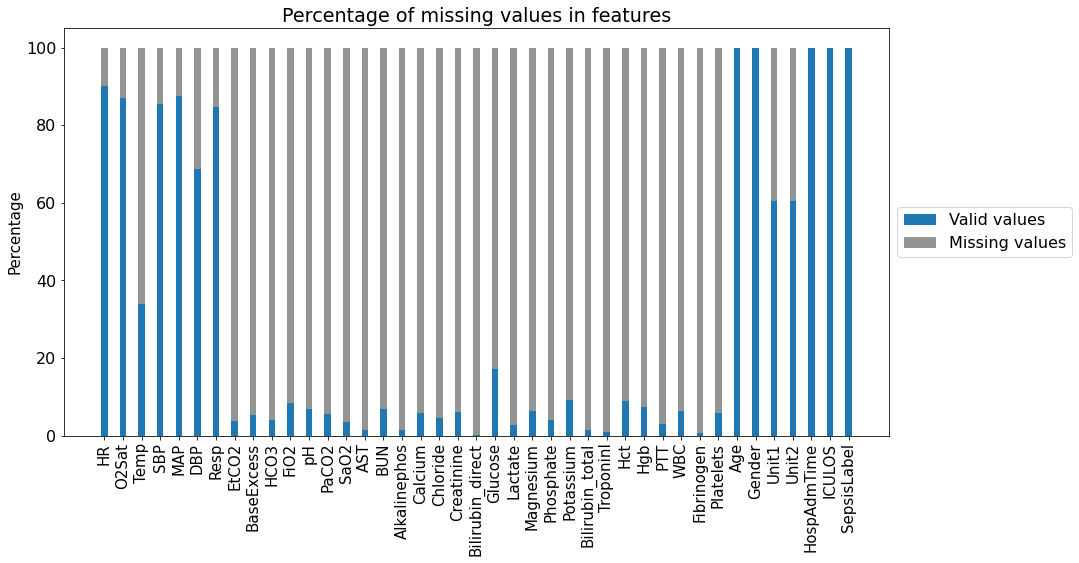

In [166]:
import matplotlib.pyplot as plt

labels = mergedData.columns
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 7.5)
plt.rcParams['font.size'] = '16'
ax.bar(labels, values, width, label='Valid values')
ax.bar(labels, nans, width, bottom=values,
       label='Missing values', color='#929591')

ax.set_ylim([0, 105])
ax.set_ylabel('Percentage', size=15)
ax.set_title('Percentage of missing values in features')

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.tick_params(axis='x', rotation=90)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)

plt.show()

### Get patients with sepsis

In [180]:
sepsisPatients = {}
nonSepsisPatients = {}

In [181]:
for pid, data in tqdm(patients.items()):
    if data['SepsisLabel'].sum() >= 1:
        sepsisPatients[pid] = data.iloc[:min(data[data['SepsisLabel'] == 1].index)-6]
    else:
        nonSepsisPatients[pid] = data

  0%|          | 0/40336 [00:00<?, ?it/s]

In [182]:
len(sepsisPatients), len(nonSepsisPatients)

(2932, 37404)

#### Check sepsis patients missing values

In [183]:
sepsisMergedData = pd.concat(list(sepsisPatients.values()))

In [184]:
sepsisTotalLen = sepsisMergedData.shape[0]

In [185]:
nans = []
values = []

for c in sepsisMergedData.columns:
    nans.append(100*sepsisMergedData[c].isnull().sum()/sepsisTotalLen)
    values.append(100 - 100*sepsisMergedData[c].isnull().sum()/sepsisTotalLen)

In [186]:
bar_label = sepsisMergedData.columns

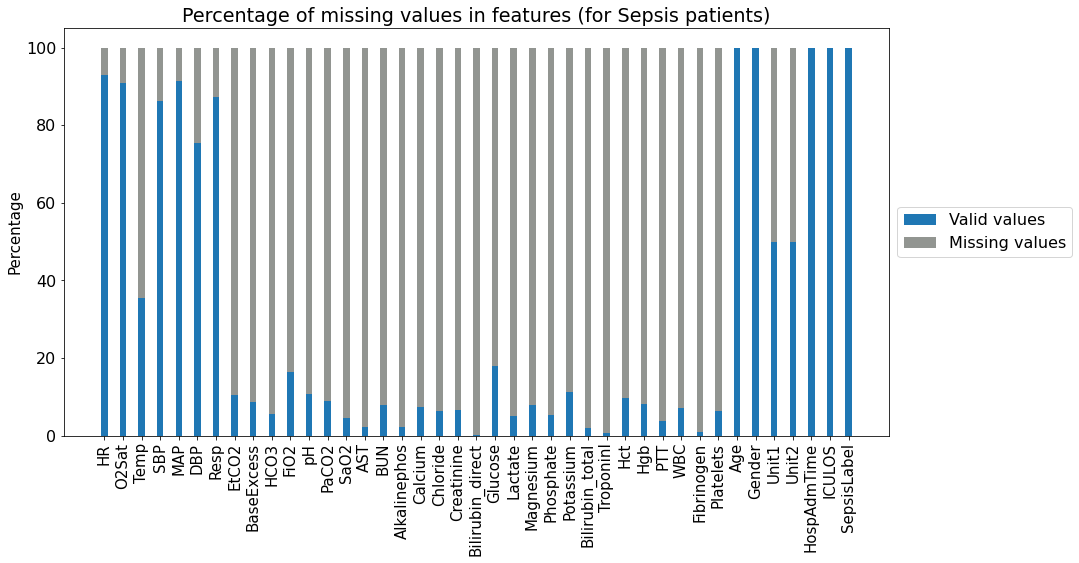

In [187]:
import matplotlib.pyplot as plt

labels = sepsisMergedData.columns
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 7.5)
plt.rcParams['font.size'] = '16'
ax.bar(labels, values, width, label='Valid values')
ax.bar(labels, nans, width, bottom=values,
       label='Missing values', color='#929591')

ax.set_ylim([0, 105])
ax.set_ylabel('Percentage', size=15)
ax.set_title('Percentage of missing values in features (for Sepsis patients)')

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.tick_params(axis='x', rotation=90)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)

plt.show()

#### Check non-sepsis patients missing values

In [188]:
nonSepsisMergedData = pd.concat(list(nonSepsisPatients.values()))

In [189]:
nonSepsisTotalLen = nonSepsisMergedData.shape[0]

In [190]:
nans = []
values = []

for c in nonSepsisMergedData.columns:
    nans.append(100*nonSepsisMergedData[c].isnull().sum()/nonSepsisTotalLen)
    values.append(100 - 100*nonSepsisMergedData[c].isnull().sum()/nonSepsisTotalLen)

In [191]:
bar_label = nonSepsisMergedData.columns

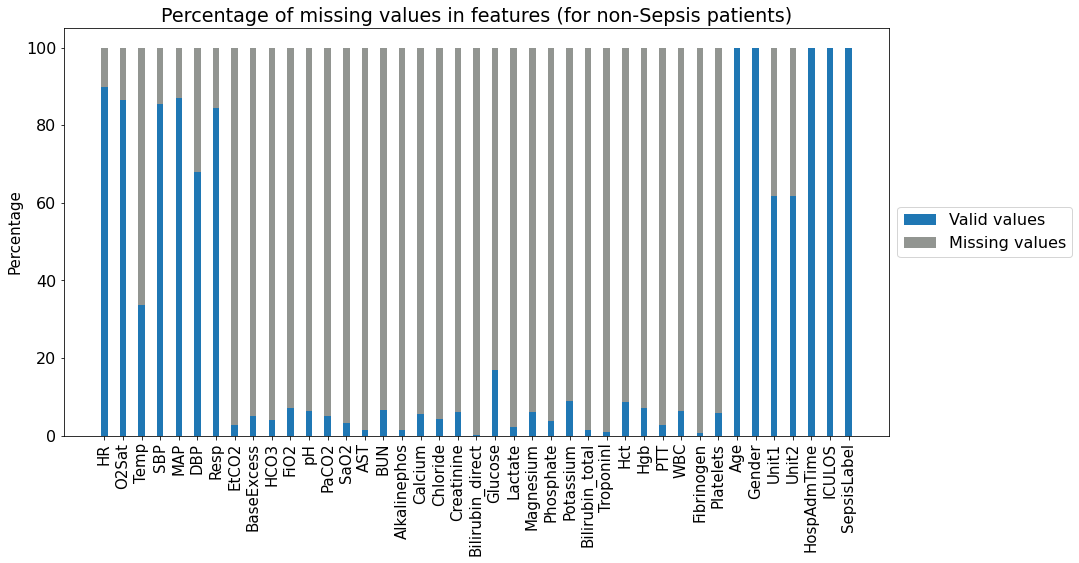

In [192]:
import matplotlib.pyplot as plt

labels = nonSepsisMergedData.columns
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 7.5)
plt.rcParams['font.size'] = '16'
ax.bar(labels, values, width, label='Valid values')
ax.bar(labels, nans, width, bottom=values,
       label='Missing values', color='#929591')

ax.set_ylim([0, 105])
ax.set_ylabel('Percentage', size=15)
ax.set_title('Percentage of missing values in features (for non-Sepsis patients)')

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.tick_params(axis='x', rotation=90)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)

plt.show()

### Filling missing values

#### Backward fill and forward fill

In [193]:
# Temporal data, missing completely at random
# First using last observation carried forward (LOCF) 
# and then Using next observation carried backward (NOCB)
sepsisPatients_partial_filled = {}
nonSepsisPatients_partial_filled = {}
for pid, data in tqdm(patients.items()):
    data = data.bfill().ffill()
    if data['SepsisLabel'].sum() >= 1:
        sepsisPatients_partial_filled[pid] = data.iloc[:min(data[data['SepsisLabel'] == 1].index)-6]
    else:
        nonSepsisPatients_partial_filled[pid] = data

  0%|          | 0/40336 [00:00<?, ?it/s]

In [194]:
len(sepsisPatients), len(nonSepsisPatients)

(2932, 37404)

#### Filling with median

In [195]:
# For the data completely missing for the patient, using the median across Sepsis/non-Sepsis patients
merged_sepsis_partial_filled = pd.concat(list(sepsisPatients_partial_filled.values()))
merged_nonsepsis_partial_filled = pd.concat(list(nonSepsisPatients_partial_filled.values()))

In [196]:
sepsis_filled = {}
sepsis_median = merged_sepsis_partial_filled.median()
for pid, data in sepsisPatients_partial_filled.items():
    data = data.fillna(sepsis_median)
    sepsis_filled[pid] = data

In [197]:
nonsepsis_filled = {}
nonsepsis_median = merged_nonsepsis_partial_filled.median()
for pid, data in nonSepsisPatients_partial_filled.items():
    data = data.fillna(nonsepsis_median)
    nonsepsis_filled[pid] = data

#### Save filled data as pkl

In [198]:
with open('sepsis_filled.pkl', 'wb') as f:
    pickle.dump(sepsis_filled, f)
    
with open('nonsepsis_filled.pkl', 'wb') as f:
    pickle.dump(nonsepsis_filled, f)